# Libraries

In [37]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import datetime
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

sns.set_style('whitegrid')
sns.set(font_scale=1.25)

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Movies Dataset

> Establishing connection with movies database

In [4]:
con = sqlite3.connect('/home/konrad/movies/movies.sqlite')
c = con.cursor()

## Dataset used for building classifiers

In [5]:
df = pd.read_sql_query("SELECt ViewForPredictionsInnerJoin.*, strftime('%Y', datetime(release_date)) AS year FROM ViewForPredictionsInnerJoin WHERE revenue <> 0 AND budget <> 0 AND Genre IS NOT NULL AND ProductionCountry IS NOT NULL AND DirectorName IS NOT NULL AND ScreenWriterName IS NOT NULL AND LeadActor IS NOT NULL ORDER BY ReturnRate DESC;", con)

In [7]:
df.shape

(2428, 28)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 28 columns):
id                     2428 non-null int64
imdb_id                2428 non-null object
title                  2428 non-null object
budget                 2428 non-null int64
revenue                2428 non-null float64
popularity             2428 non-null float64
runtime                2428 non-null int64
vote_average           2428 non-null float64
vote_count             2428 non-null int64
release_date           2428 non-null object
ReturnRate             2428 non-null float64
ProductionCountry      2428 non-null object
Genre                  2428 non-null object
DirectorName           2428 non-null object
DirectedMoviesTotal    2428 non-null int64
ScreenWriterName       2428 non-null object
WrittenMoviesTotal     2428 non-null int64
LeadActor              2428 non-null object
cast_counted           2428 non-null int64
BudgetPerCastM         2428 non-null int64
RevenuePerCastM  

<dr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Defining Target variable

In [9]:
df['PaidOffMovie'] = df['ReturnRate'].apply(lambda x: 1 if x >=1 else 0)

In [10]:
df['PaidOffMovie'].value_counts()

1    1851
0     577
Name: PaidOffMovie, dtype: int64

In [11]:
print("The fraction of True is equal to: {0:.0%}".format(1851 / (1851 + 577)))

The fraction of True is equal to: 76%


<dr>

> Top 10 movies ordered by return rate

In [12]:
df.head(100).transpose()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
id,985,9462,692,10331,9659,1842,838,29473,28172,5723,...,90,100,615,11547,10134,8329,772,403,581,5722
imdb_id,tt0074486,tt0068935,tt0069089,tt0063350,tt0079501,tt0068837,tt0069704,tt0073282,tt0056875,tt0907657,...,tt0086960,tt0120735,tt0335345,tt0303816,tt0097138,tt1038988,tt0104431,tt0097239,tt0099348,tt0065466
title,Eraserhead,The Way of the Dragon,Pink Flamingos,Night of the Living Dead,Mad Max,The Legend of Boggy Creek,American Graffiti,Let's Do It Again,Blood Feast,Once,...,Beverly Hills Cop,"Lock, Stock and Two Smoking Barrels",The Passion of the Christ,Cabin Fever,Cyborg,[REC],Home Alone 2: Lost in New York,Driving Miss Daisy,Dances with Wolves,Beyond the Valley of the Dolls
budget,10000,130000,12000,114000,400000,100000,777000,70000,24500,160000,...,15000000,1350000,30000000,1500000,500000,1500000,18000000,7500000,22000000,2090000
revenue,7e+06,8.5e+07,6e+06,3e+07,1e+08,2.2e+07,1.4e+08,1.18e+07,4e+06,2.07105e+07,...,3.1636e+08,2.83562e+07,6.11899e+08,3.05534e+07,1.01665e+07,3.0448e+07,3.58992e+08,1.45793e+08,4.24209e+08,4e+07
popularity,6.391,8.269,5.986,8.303,14.868,1.288,7.351,1.563,2.071,6.137,...,12.399,6.262,10.431,6.952,5.8,9.342,26.917,7.825,8.019,4.93
runtime,89,100,93,96,91,90,110,110,67,85,...,105,105,127,93,86,78,120,99,181,109
vote_average,7.6,7.5,6.2,7.6,6.7,5.4,7.1,7,5,7.5,...,7,7.9,7,5.5,5,7.1,6.5,7.2,7.8,6.5
vote_count,889,371,174,937,1842,26,553,12,47,637,...,1608,2619,1505,526,229,1685,4388,566,1735,76
release_date,1977-03-19,1972-06-01,1972-03-12,1968-10-01,1979-04-12,1972-08-01,1973-08-01,1975-10-11,1963-06-06,2007-03-23,...,1984-11-29,1998-03-05,2004-02-25,2003-08-15,1989-04-07,2007-04-10,1992-11-19,1989-12-13,1990-11-09,1970-07-17


<dr>

> Bottom 10 movies ordered by return rate

In [13]:
df.tail(100).transpose()

,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,...,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427
id,12634,346,18615,8046,17320,16564,13702,13922,1902,33157,...,11446,25974,35614,452,17796,8349,31668,15785,12518,31642
imdb_id,tt0315824,tt0047478,tt0422295,tt0299930,tt0473709,tt0795441,tt0365125,tt0326905,tt0125659,tt0066549,...,tt0114906,tt0488164,tt0108395,tt0154421,tt0109838,tt0365675,tt0252223,tt0092746,tt0104438,tt0107096
title,The Big Bounce,Seven Samurai,Fur: An Imaginary Portrait of Diane Arbus,Gigli,The TV Set,Winter in Wartime,A Dirty Shame,The Great Raid,Open Your Eyes,Waterloo,...,Welcome to the Dollhouse,Moscow Zero,A Troll in Central Park,The Idiots,Freaked,The Red Baron,All The Queen's Men,Cherry 2000,Honeymoon in Vegas,Heaven & Earth
budget,50000000,2000000,16800000,54000000,2000000,4000000,15000000,80000000,2900000,25000000,...,800,10000000,23000000,2500000,13000000,18000000,15000000,10000000,25000000,33000000
revenue,6.80855e+06,271841,2.28109e+06,7.26621e+06,265198,530048,1.91417e+06,1.01665e+07,368234,3.052e+06,...,5,62500,71368,7235,29296,40239,23000,14000,35,5
popularity,4.802,13.441,6.366,5.633,1.777,4.191,4.953,4.41,6.382,2.267,...,4.615,1.891,2.751,9.022,2.804,4.289,0.62,4.68,6.066,3.655
runtime,88,207,122,121,87,103,89,132,117,128,...,88,82,76,117,86,120,99,99,96,140
vote_average,5,8.4,6.1,3.6,5.8,6.7,5.2,6.7,7.5,7.3,...,7.1,3.7,4.6,6.5,5.9,6.4,5.8,5.9,5.5,6.6
vote_count,112,1311,120,171,32,90,94,123,340,50,...,149,10,60,194,46,105,8,95,117,74
release_date,2004-01-30,1954-04-26,2006-08-30,2003-08-01,2006-04-28,2008-11-17,2004-09-12,2005-08-12,1997-12-19,1970-10-26,...,1996-05-24,2006-11-05,1994-10-07,1998-04-28,1993-09-11,2008-03-29,2001-10-14,1987-11-12,1992-08-28,1993-12-24


<dr>

> Distribution of True by Genre

In [15]:
s = df.apply(lambda x: pd.Series(x['Genre']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'Genre'
genreClasees = df.drop('Genre', axis=1).join(s)

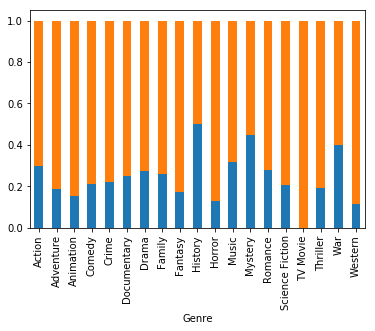

In [17]:
ctab = pd.crosstab([genreClasees['Genre']], genreClasees['PaidOffMovie'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', stacked=True, legend=False)

<dr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Filling Null values

In [18]:
df.columns

Index(['id', 'imdb_id', 'title', 'budget', 'revenue', 'popularity', 'runtime',
       'vote_average', 'vote_count', 'release_date', 'ReturnRate',
       'ProductionCountry', 'Genre', 'DirectorName', 'DirectedMoviesTotal',
       'ScreenWriterName', 'WrittenMoviesTotal', 'LeadActor', 'cast_counted',
       'BudgetPerCastM', 'RevenuePerCastM', 'crew_counted', 'BudgetPerCrewM',
       'RevenuePerCrewM', 'StaffSize', 'BudgetPerStaffS', 'RevenuePerStaffS',
       'year', 'PaidOffMovie'],
      dtype='object')

In [19]:
genreClasses = df['Genre'].drop_duplicates()

In [20]:
for genre in genreClasses:
    df['is_' + str(genre)] = df['Genre'].apply(lambda x: 1 if genre in x else 0)

In [21]:
def feature_engineering(df):
    for genre in genreClasses:
        df['is_' + str(genre)] = df['Genre'].apply(lambda x: 1 if genre in x else 0)
    df['is_US'] = df['ProductionCountry'].apply(lambda x: 1 if x in ['US'] else 0)
    #df['runtime'] = df['runtime'].fillna(df['runtime'].median())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df['vote_count'] = df['vote_count'].fillna(df['vote_count'].mean())
    df['ReturnRate'] = df['ReturnRate'].fillna(df['ReturnRate'].mean())
    df['DirectedMoviesTotal'] = df['DirectedMoviesTotal'].fillna(df['DirectedMoviesTotal'].mean())
    df['WrittenMoviesTotal'] = df['WrittenMoviesTotal'].fillna(df['WrittenMoviesTotal'].mean())
    df['cast_counted'] = df['cast_counted'].fillna(df['cast_counted'].mean())
    df['BudgetPerCastM'] = df['BudgetPerCastM'].fillna(df['BudgetPerCastM'].mean())
    df['RevenuePerCastM'] = df['RevenuePerCastM'].fillna(df['RevenuePerCastM'].mean())
    df['crew_counted'] = df['crew_counted'].fillna(df['crew_counted'].mean())
    df['BudgetPerCrewM'] = df['BudgetPerCrewM'].fillna(df['BudgetPerCrewM'].mean())
    df['RevenuePerCrewM'] = df['RevenuePerCrewM'].fillna(df['RevenuePerCrewM'].mean())
    df['StaffSize'] = df['StaffSize'].fillna(df['StaffSize'].mean())
    df['BudgetPerStaffS'] = df['BudgetPerStaffS'].fillna(df['BudgetPerStaffS'].mean())
    df['RevenuePerStaffS'] = df['RevenuePerStaffS'].fillna(df['RevenuePerStaffS'].mean())
    return df

In [22]:
null_data = df[df.isnull().any(axis=1)]
null_data.head(100)

,id,imdb_id,title,budget,revenue,popularity,runtime,vote_average,vote_count,release_date,...,is_Documentary,is_Music,is_Romance,is_Thriller,is_Crime,is_Family,is_Animation,is_History,is_TV Movie,is_War


<dr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Performing feature engineering

In [23]:
df = feature_engineering(df)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 49 columns):
id                     2428 non-null int64
imdb_id                2428 non-null object
title                  2428 non-null object
budget                 2428 non-null int64
revenue                2428 non-null float64
popularity             2428 non-null float64
runtime                2428 non-null int64
vote_average           2428 non-null float64
vote_count             2428 non-null int64
release_date           2428 non-null object
ReturnRate             2428 non-null float64
ProductionCountry      2428 non-null object
Genre                  2428 non-null object
DirectorName           2428 non-null object
DirectedMoviesTotal    2428 non-null int64
ScreenWriterName       2428 non-null object
WrittenMoviesTotal     2428 non-null int64
LeadActor              2428 non-null object
cast_counted           2428 non-null int64
BudgetPerCastM         2428 non-null int64
RevenuePerCastM  

In [25]:
df.head().transpose()

,0,1,2,3,4
id,985,9462,692,10331,9659
imdb_id,tt0074486,tt0068935,tt0069089,tt0063350,tt0079501
title,Eraserhead,The Way of the Dragon,Pink Flamingos,Night of the Living Dead,Mad Max
budget,10000,130000,12000,114000,400000
revenue,7e+06,8.5e+07,6e+06,3e+07,1e+08
popularity,6.391,8.269,5.986,8.303,14.868
runtime,89,100,93,96,91
vote_average,7.6,7.5,6.2,7.6,6.7
vote_count,889,371,174,937,1842
release_date,1977-03-19,1972-06-01,1972-03-12,1968-10-01,1979-04-12


In [26]:
df.tail().transpose()

,2423,2424,2425,2426,2427
id,8349,31668,15785,12518,31642
imdb_id,tt0365675,tt0252223,tt0092746,tt0104438,tt0107096
title,The Red Baron,All The Queen's Men,Cherry 2000,Honeymoon in Vegas,Heaven & Earth
budget,18000000,15000000,10000000,25000000,33000000
revenue,40239,23000,14000,35,5
popularity,4.289,0.62,4.68,6.066,3.655
runtime,120,99,99,96,140
vote_average,6.4,5.8,5.9,5.5,6.6
vote_count,105,8,95,117,74
release_date,2008-03-29,2001-10-14,1987-11-12,1992-08-28,1993-12-24


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

## Preparing the set for training of classifiers

> Sellecting target

In [27]:

X, y = df.drop(['popularity','vote_count','vote_average','year','ReturnRate','revenue','RevenuePerStaffS','RevenuePerCrewM','RevenuePerCastM','PaidOffMovie','id','imdb_id','title','release_date','ProductionCountry','Genre','DirectorName','LeadActor','ScreenWriterName'], axis=1), df['PaidOffMovie']

> Standarization of variables

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X)

/home/konrad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


> Splitting dataset on Train and Test datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scale, y, train_size=0.75, test_size=0.25, stratify=y)

### Dummy Classifier

> Training Dummy Classifier

In [30]:
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.6507413509060955

### Building Gradient Boosting Classifier

> Training Gradient Boosting Classifier

In [31]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7528830313014827

> Variables Importance of Gradient Boosting Classifier

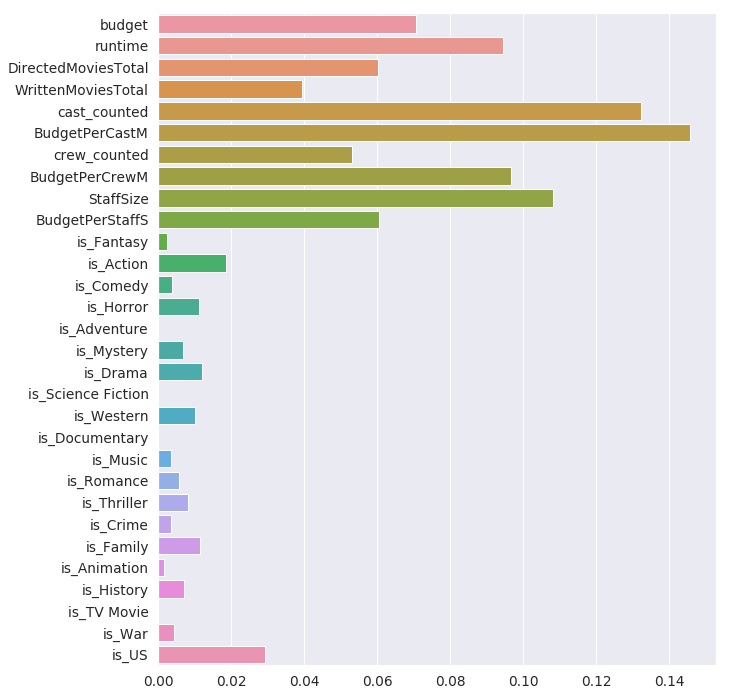

In [38]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf.feature_importances_, y=X.columns)

### Cross Validated Gradient Boosting Classifier

> Traing Cross Validated Gradient Boosting Classifier

In [40]:
learning_rates = [0.05, 0.1, 0.15, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.4f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.4f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.7622
Accuracy score (validation): 0.7628

Learning rate:  0.1
Accuracy score (training): 0.7622
Accuracy score (validation): 0.7628

Learning rate:  0.15
Accuracy score (training): 0.7661
Accuracy score (validation): 0.7628

Learning rate:  0.25
Accuracy score (training): 0.7710
Accuracy score (validation): 0.7677

Learning rate:  0.3
Accuracy score (training): 0.7738
Accuracy score (validation): 0.7677

Learning rate:  0.35
Accuracy score (training): 0.7754
Accuracy score (validation): 0.7611

Learning rate:  0.4
Accuracy score (training): 0.7748
Accuracy score (validation): 0.7628

Learning rate:  0.45
Accuracy score (training): 0.7792
Accuracy score (validation): 0.7611

Learning rate:  0.5
Accuracy score (training): 0.7798
Accuracy score (validation): 0.7628

Learning rate:  0.55
Accuracy score (training): 0.7792
Accuracy score (validation): 0.7628

Learning rate:  0.6
Accuracy score (training): 0.7809
Accuracy score (validation): 0

> Confusion matrix of Cross Validated Gradient Boosting Classifier

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = gb.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 10 134]
 [ 30 433]]


> Accuracy score of Cross Validated Gradient Boosting Classifier

In [42]:
gb.score(X_train, y_train)

0.7830862163646348

> F1 Score of Cross Validated Gradient Boosting Classifier

In [43]:
from sklearn.metrics import classification_report
predictions = gb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11       144
           1       0.76      0.94      0.84       463

   micro avg       0.73      0.73      0.73       607
   macro avg       0.51      0.50      0.47       607
weighted avg       0.64      0.73      0.67       607



> Area Under the Curve of Cross Validated Gradient Boosting Classifier

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

y_scores_gb = gb.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.4f}".format(roc_auc_gb))

Area under ROC curve = 0.6230


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Logistic Regression

> Training Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/konrad/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

> Accuracy score of Logistic Regression

In [46]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7644


> Confusion matrix of Logistic Regression

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  4 140]
 [  3 460]]


> F1 Score of Logistic Regression

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.03      0.05       144
           1       0.77      0.99      0.87       463

   micro avg       0.76      0.76      0.76       607
   macro avg       0.67      0.51      0.46       607
weighted avg       0.72      0.76      0.67       607



> Accuracy score of Logistic Regression

In [49]:
logreg.score(X_train, y_train)

0.7671609006040637

> Area Under the Curve of Logistic Regression

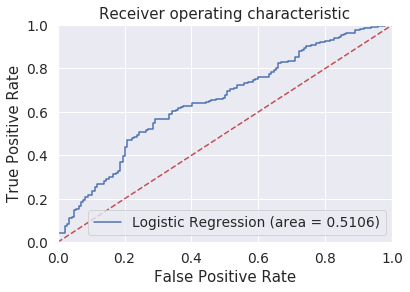

In [50]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Decission tree with Gini criterion method

> Training Decision Tree

In [51]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

> Variables importance of Decission Tree

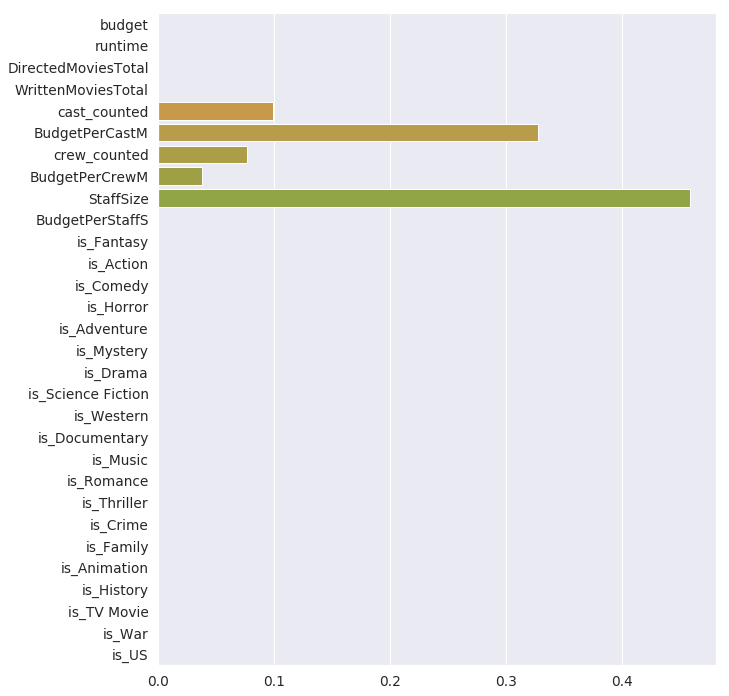

In [52]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf_gini.feature_importances_, y=X.columns)

In [53]:
y_pred = clf_gini.predict(X_test)

> Accuracy score of Decission Tree

In [54]:
print("Accuracy is ", accuracy_score(y_test,y_pred))

Accuracy is  0.7528830313014827


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Decission tree with Entropy criterion method

> Training Decission Tree

In [55]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

> Variables importance of Decission Tree

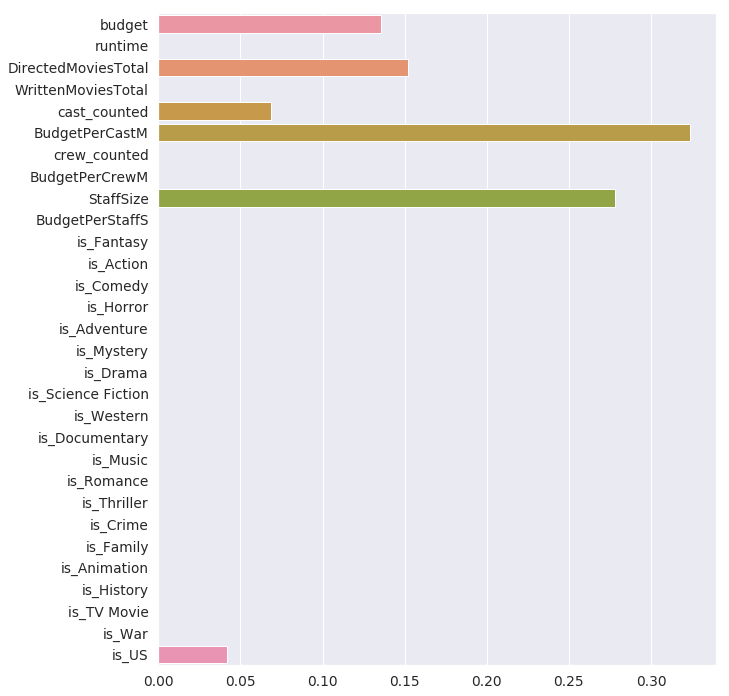

In [56]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf_entropy.feature_importances_, y=X.columns)

In [57]:
y_pred_en = clf_entropy.predict(X_test)

> Accuracy score of Decission Tree

In [58]:
print("Accuracy is ", accuracy_score(y_test,y_pred_en))

Accuracy is  0.7561779242174629


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Neural Network

> Training Neural Network

In [59]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_test, y_test)                         
mlp = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(5, 2),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [60]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

> Confusion matrix of Neural Network

In [61]:
from sklearn.metrics import confusion_matrix
y_pred = mlp.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  0 144]
 [  0 463]]


> F1 Score of Logistic Regression

In [62]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.07      0.11       144
           1       0.76      0.94      0.84       463

   micro avg       0.73      0.73      0.73       607
   macro avg       0.51      0.50      0.47       607
weighted avg       0.64      0.73      0.67       607



> Accuracy score of Neural Network

In [63]:
mlp.score(X_train, y_train)

0.7622185612300933

> Attributes of Neural Network

In [64]:
len(mlp.coefs_)

3

In [65]:
len(mlp.coefs_[0])

30

In [66]:
len(mlp.intercepts_[0])

5

# The final Champion is Cross Validated Gradient Boosting Classifier